In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
df = pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder 
for i in df.columns:
    if type(df[i][0]) is type('str'):
        df[i] = LabelEncoder().fit_transform(df[i])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


<Axes: >

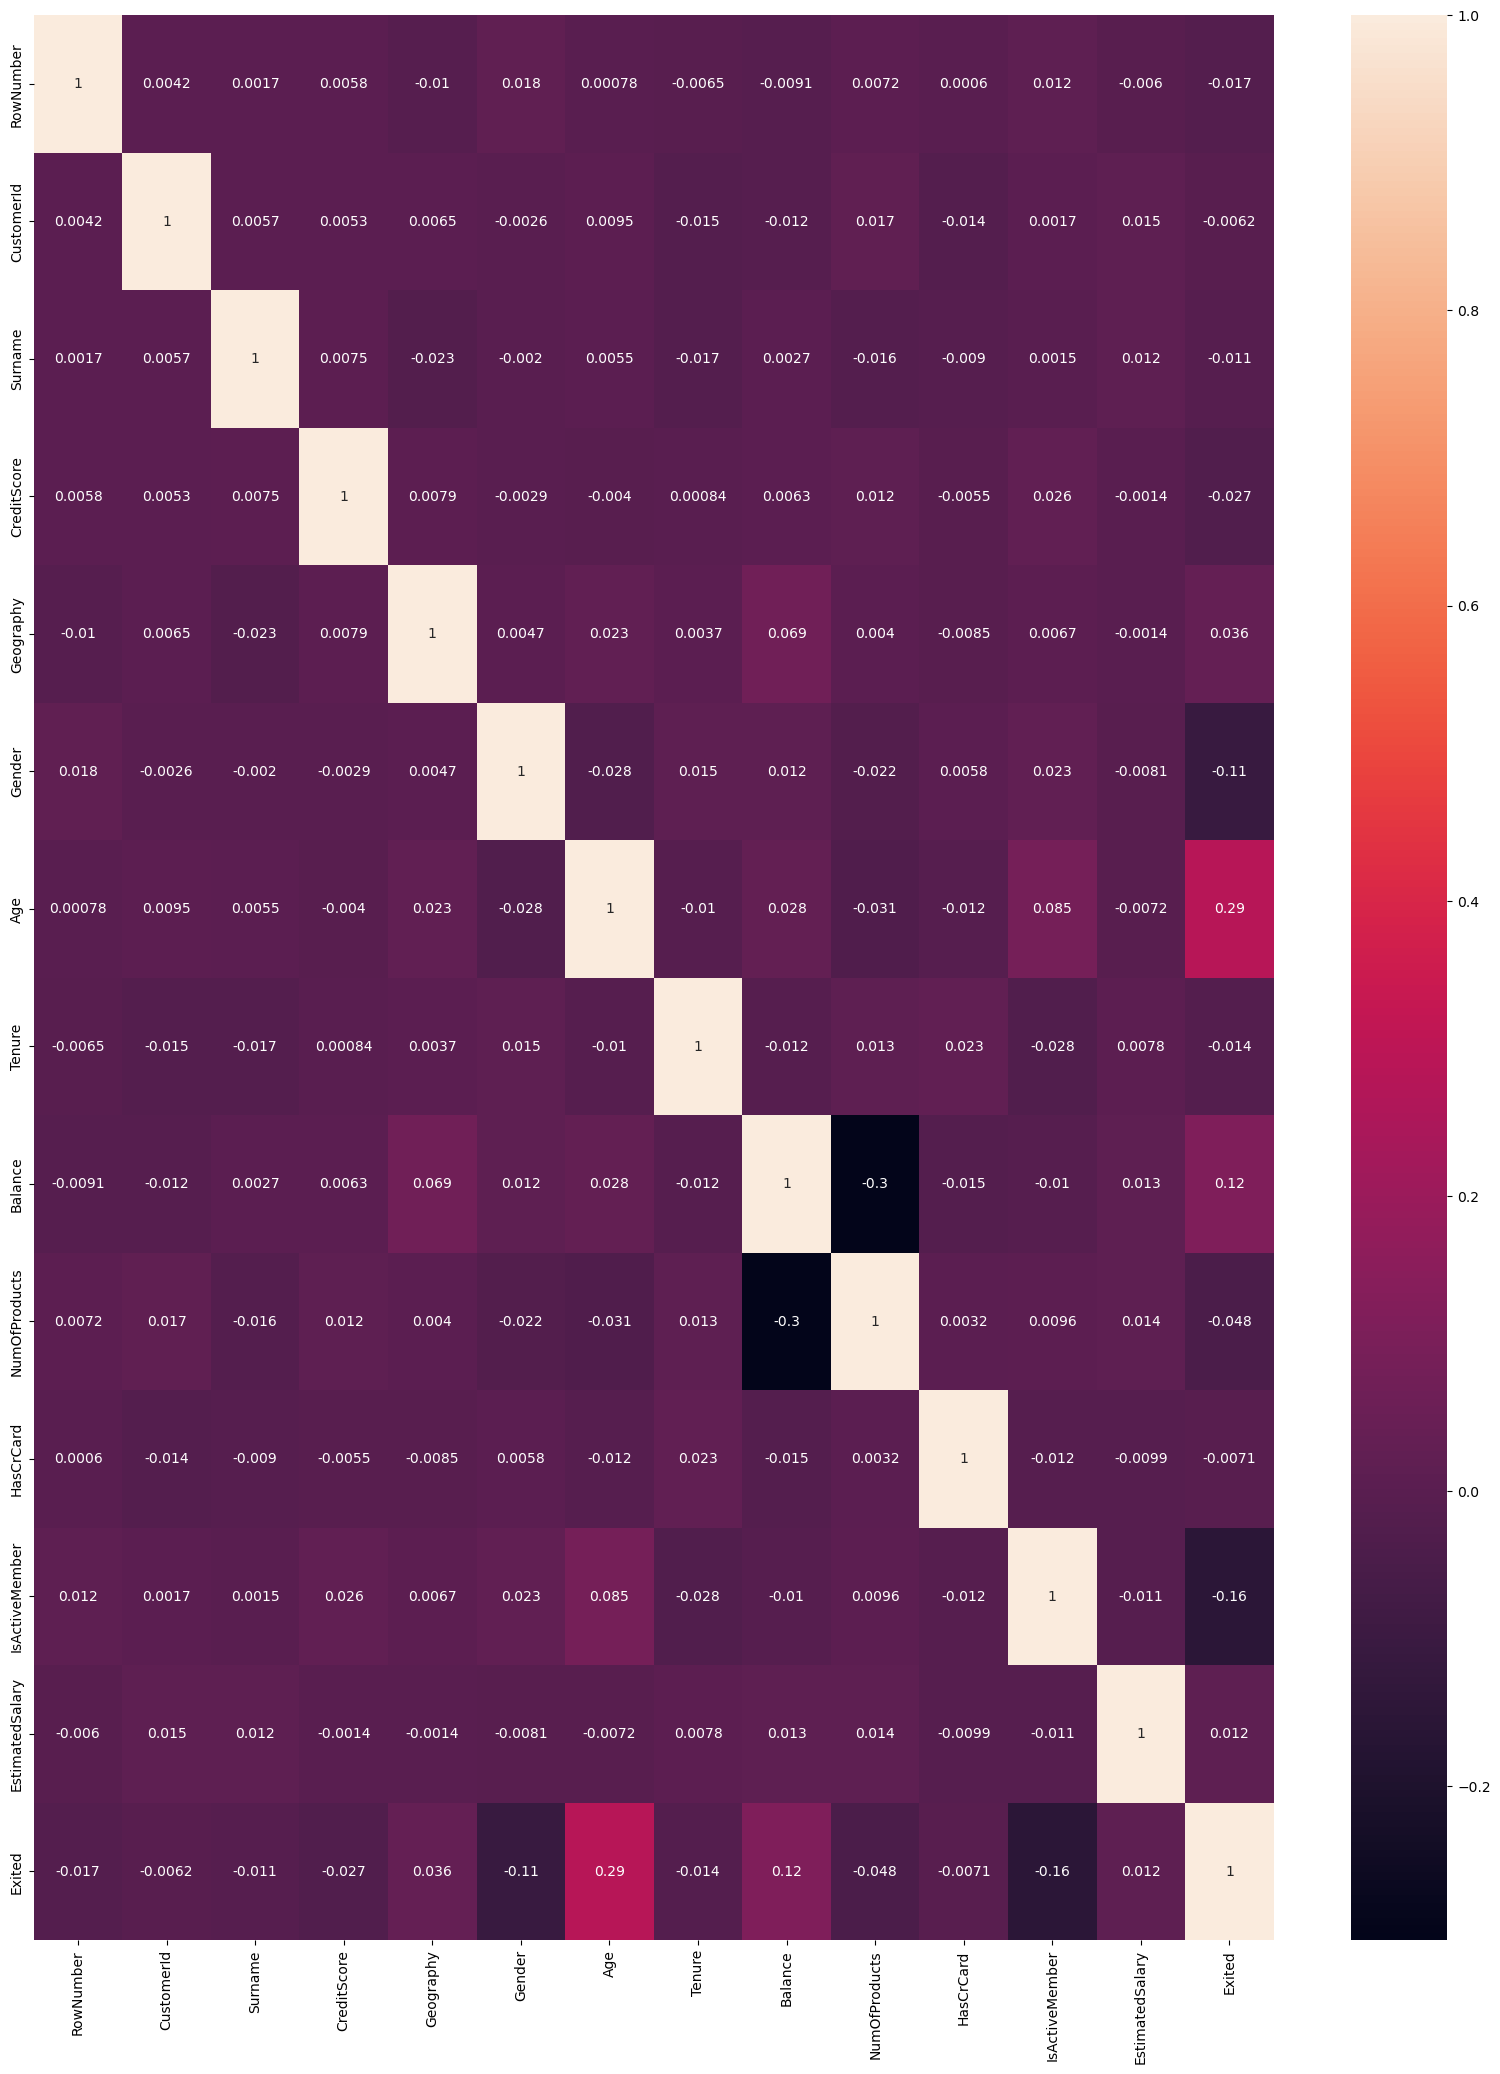

In [11]:
corr = df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(corr, annot=True)

In [12]:
features = corr['Exited'].sort_values(ascending=False)[1:]

In [13]:
features.index

Index(['Age', 'Balance', 'Geography', 'EstimatedSalary', 'CustomerId',
       'HasCrCard', 'Surname', 'Tenure', 'RowNumber', 'CreditScore',
       'NumOfProducts', 'Gender', 'IsActiveMember'],
      dtype='object')

In [14]:
features.values

array([ 0.28532304,  0.11853277,  0.03594295,  0.01209686, -0.00624799,
       -0.00713777, -0.01082191, -0.01400061, -0.01657137, -0.02709354,
       -0.04781986, -0.10651249, -0.15612828])

<Axes: >

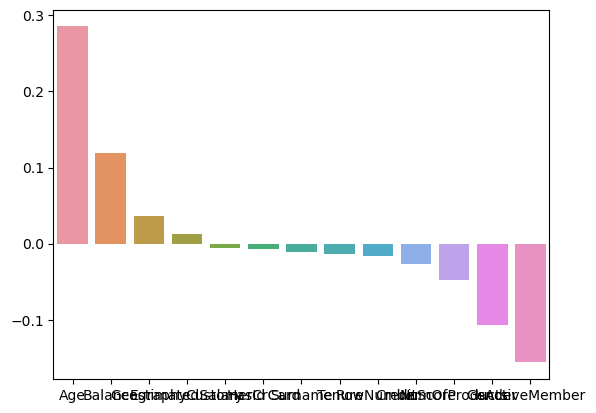

In [15]:
sns.barplot(x = features.index, y=features.values)

<Axes: xlabel='Exited', ylabel='count'>

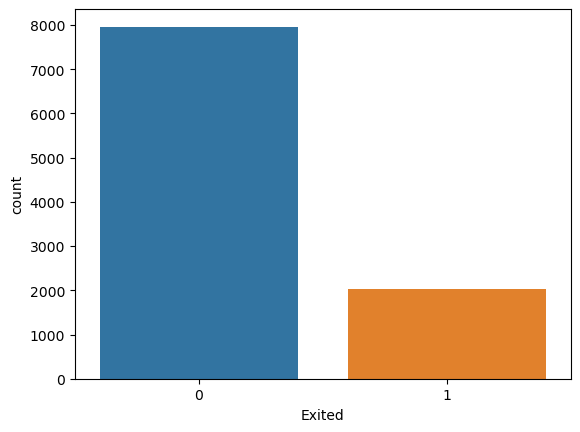

In [16]:
sns.countplot(x='Exited', data=df)

<Axes: xlabel='Exited', ylabel='count'>

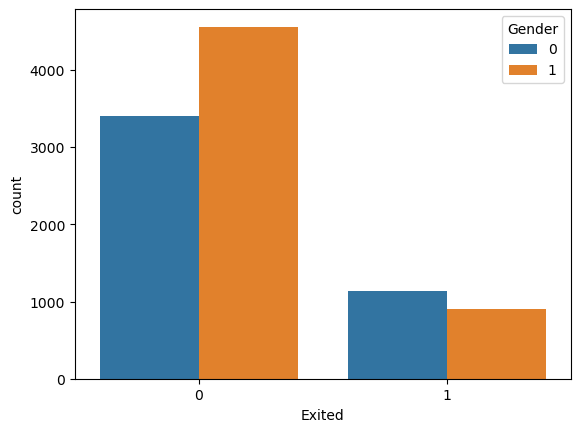

In [17]:
sns.countplot(x='Exited', data=df, hue='Gender')

/home/mohammad/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/mohammad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/mohammad/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/mohammad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


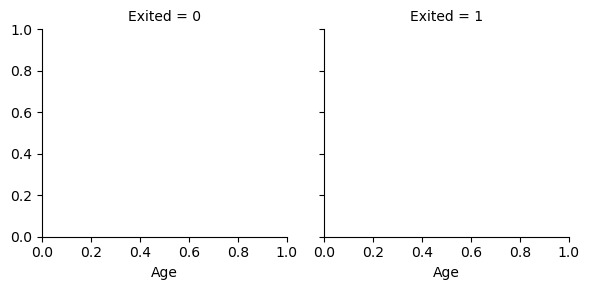

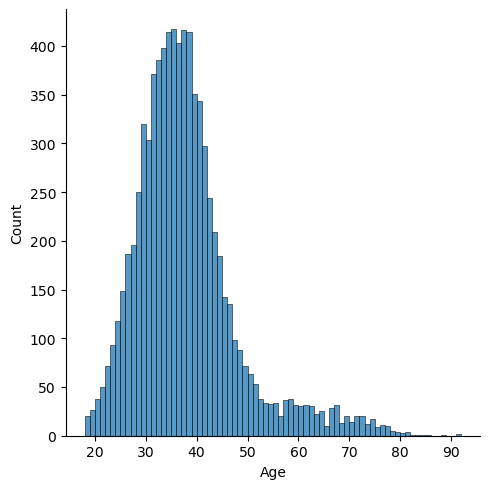

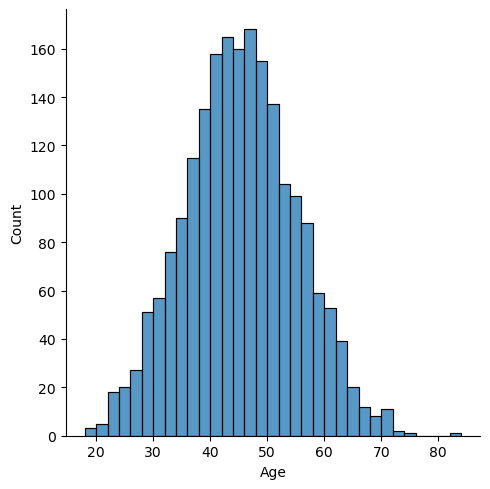

In [18]:
sns.FacetGrid(df, col='Exited')\
    .map(sns.displot, 'Age')

In [19]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [20]:
#df['test'] = df['test'].astype('category').cat.codes // convert string to number 
X = df.drop(columns=['Exited']).values
y = df['Exited'].values

In [21]:
X.shape,y.shape

((10000, 10), (10000,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from xgboost import XGBClassifier

In [24]:
basic_model = XGBClassifier()
basic_model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
from sklearn.metrics import confusion_matrix, f1_score , classification_report 

In [26]:
def eval(model):
    print("train data", model.score(X_train, y_train))
    print("test data", model.score(X_test, y_test))
    pred = model.predict(X_test)
    print("confusion_matrix", confusion_matrix(y_test, pred))
    print("f1_score", f1_score(y_test, pred))
    print("classification_report", classification_report(y_test, pred))


In [27]:
eval(basic_model)

train data 0.9619402985074627
test data 0.8639393939393939
confusion_matrix [[2521  136]
 [ 313  330]]
f1_score 0.5951307484220018
classification_report               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2657
           1       0.71      0.51      0.60       643

    accuracy                           0.86      3300
   macro avg       0.80      0.73      0.76      3300
weighted avg       0.85      0.86      0.86      3300



In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
xgb_params = {
    'n_estimators' : [100, 200],
    'max_depth' : [4,5]
}

In [30]:
grid = GridSearchCV(XGBClassifier(), param_grid=xgb_params, scoring='accuracy', cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [31]:
print("Best score", grid.best_score_)

Best score 0.8497014925373133


In [32]:
print("Best score", grid.best_params_)

Best score {'max_depth': 4, 'n_estimators': 100}


In [33]:
model_1 = XGBClassifier(max_depth=4)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
eval(model_1)

train data 0.905223880597015
test data 0.8654545454545455
confusion_matrix [[2534  123]
 [ 321  322]]
f1_score 0.5919117647058824
classification_report               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2657
           1       0.72      0.50      0.59       643

    accuracy                           0.87      3300
   macro avg       0.81      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300



In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
model_2 = GradientBoostingClassifier(n_estimators=500)
model_2.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [37]:
eval(model_2)

train data 0.9073134328358209
test data 0.8690909090909091
confusion_matrix [[2546  111]
 [ 321  322]]
f1_score 0.5985130111524164
classification_report               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.74      0.50      0.60       643

    accuracy                           0.87      3300
   macro avg       0.82      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300

